In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [19]:
data = pd.read_csv('../dataset/bank_transactions.csv')


In [20]:
data.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207.0,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858.0,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712.0,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714.0,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156.0,1762.5


In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8137 entries, 0 to 8136
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            8137 non-null   object 
 1   CustomerID               8137 non-null   object 
 2   CustomerDOB              8108 non-null   object 
 3   CustGender               8134 non-null   object 
 4   CustLocation             8136 non-null   object 
 5   CustAccountBalance       8126 non-null   float64
 6   TransactionDate          8137 non-null   object 
 7   TransactionTime          8136 non-null   float64
 8   TransactionAmount (INR)  8136 non-null   float64
dtypes: float64(3), object(6)
memory usage: 572.3+ KB


In [22]:
# data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format='%d-%m-%Y')


In [23]:
data.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207.0,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858.0,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712.0,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714.0,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156.0,1762.5


In [24]:
data.isnull().sum()

TransactionID               0
CustomerID                  0
CustomerDOB                29
CustGender                  3
CustLocation                1
CustAccountBalance         11
TransactionDate             0
TransactionTime             1
TransactionAmount (INR)     1
dtype: int64

In [25]:
data.dropna(inplace=True)


In [26]:
data.isnull().sum()


TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [27]:
Label_encoder = LabelEncoder()
data['CustLocation'] = Label_encoder.fit_transform(data['CustLocation'])

In [29]:
data.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,420,17819.05,02-08-2016,143207.0,25.00
1,T2,C2142763,04-04-1957,M,427,2270.69,02-08-2016,141858.0,27999.00
2,T3,C4417068,26-11-1996,F,609,17874.44,02-08-2016,142712.0,459.00
3,T4,C5342380,14-09-1973,F,609,866503.21,02-08-2016,142714.0,2060.00
4,T5,C9031234,24-03-1988,F,655,6714.43,02-08-2016,181156.0,1762.50
5,T6,C1536588,08-10-1972,F,403,53609.20,02-08-2016,173940.0,676.00
6,T7,C7126560,26-01-1992,F,609,973.46,02-08-2016,173806.0,566.00
7,T8,C1220223,27-01-1982,M,609,95075.54,02-08-2016,170537.0,148.00
8,T9,C8536061,19-04-1988,F,357,14906.96,02-08-2016,192825.0,833.00
9,T10,C6638934,22-06-1984,M,609,4279.22,02-08-2016,192446.0,289.11


In [30]:
numeric_features = data[['CustAccountBalance','CustLocation', 'TransactionAmount (INR)']]


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8092 entries, 0 to 8135
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            8092 non-null   object 
 1   CustomerID               8092 non-null   object 
 2   CustomerDOB              8092 non-null   object 
 3   CustGender               8092 non-null   object 
 4   CustLocation             8092 non-null   int64  
 5   CustAccountBalance       8092 non-null   float64
 6   TransactionDate          8092 non-null   object 
 7   TransactionTime          8092 non-null   float64
 8   TransactionAmount (INR)  8092 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 632.2+ KB


In [31]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

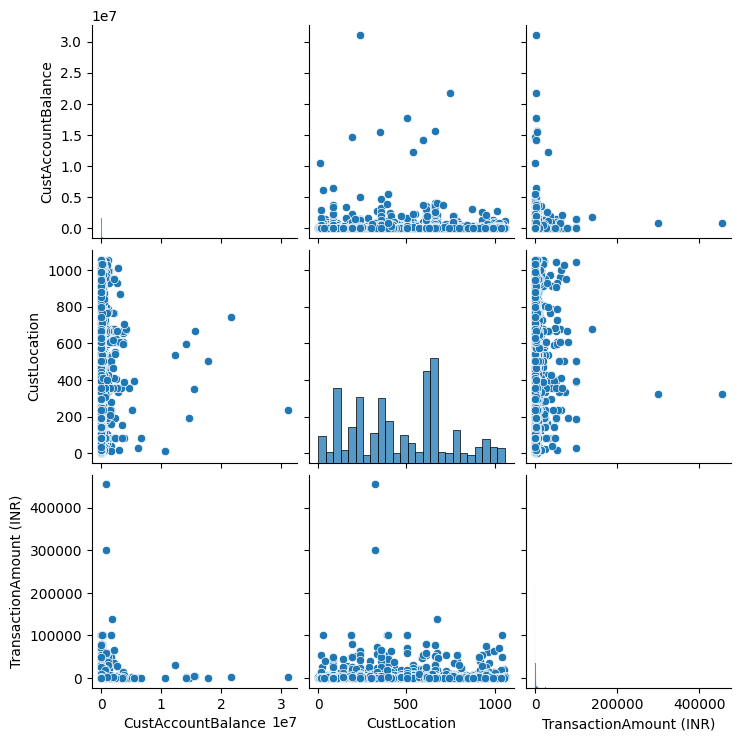

In [32]:
sns.pairplot(data[['CustAccountBalance','CustLocation', 'TransactionAmount (INR)']])
plt.show()

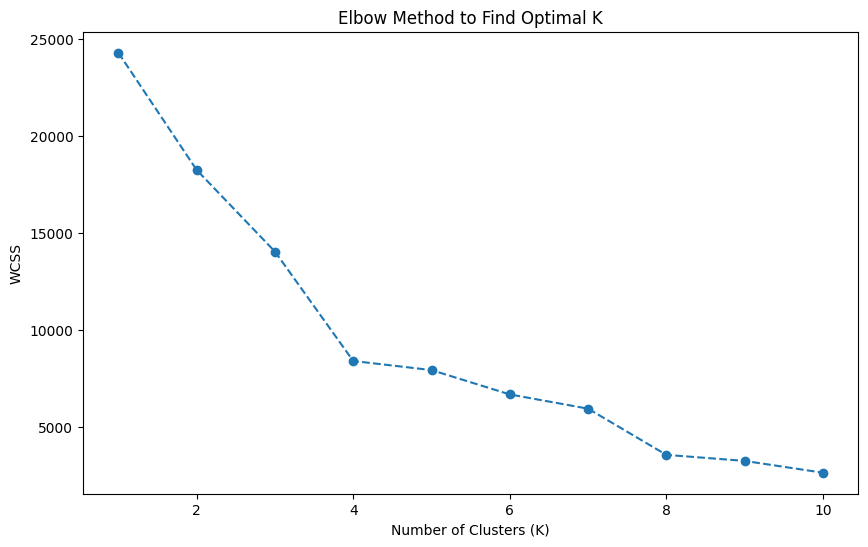

In [34]:
# Using the Elbow Method to find the optimal number of clusters (K)
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal K')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [36]:
data['Cluster']

0       0
1       0
2       1
3       1
4       1
       ..
8131    0
8132    1
8133    1
8134    0
8135    1
Name: Cluster, Length: 8092, dtype: int32